<h1>Problem Statement:</h1>
<p>The data set that I am used in this notebook  is from UCI Machine Learning . 
These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. Here in this problem we have to find the quality of the wine in scale of 0-10 , Hence we are predicting a multiclass dependant variable </p>

<h2>Following is the approach</h2>

<p >1. Installation of spark</br> 2. Creating a spark context </br> 3.Importing of file (Data-set)</br> 4.Basic EDA(Correlation-Plot )</br> 5.Vectorization of Data (Pipline Method) </br> 6. Spliting into train and Test </br>7.Used Machine Learning algorithms </br> 8. Validation score of our predictions  </p>

<h3> Detailed explaination of every step is also provided below</h3>


<h1 align="Center"> Installing Spark</h1>

In [1]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-2.2.1/spark-2.2.1-bin-hadoop2.7.tgz
!tar xf spark-2.2.1-bin-hadoop2.7.tgz
!pip install -q findspark

Get:1 http://security.ubuntu.com/ubuntu artful-security InRelease [83.2 kB]
Hit:2 http://archive.ubuntu.com/ubuntu artful InRelease
Get:3 http://archive.ubuntu.com/ubuntu artful-updates InRelease [88.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu artful-backports InRelease [74.6 kB]
Get:5 http://security.ubuntu.com/ubuntu artful-security/universe Sources [21.5 kB]
Get:6 http://security.ubuntu.com/ubuntu artful-security/universe amd64 Packages [84.3 kB]
Get:7 http://archive.ubuntu.com/ubuntu artful-updates/universe Sources [46.2 kB]
Get:8 http://archive.ubuntu.com/ubuntu artful-updates/universe amd64 Packages [150 kB]
Get:9 http://archive.ubuntu.com/ubuntu artful-updates/main amd64 Packages [365 kB]
Fetched 914 kB in 0s (1,046 kB/s)
Reading package lists... Done


In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.2.1-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [4]:
sc = spark.sparkContext
sc


<SparkContext master=local[*] appName=pyspark-shell>

In [0]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml').getOrCreate()

<h1 align="Center"> Importing FIle<h1>

In [6]:
from google.colab import files
datafile = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [0]:
data_file = "./winequality-white.csv"
df = spark.read.csv(data_file, sep=";",header=True,inferSchema = True)

In [8]:
df.show()

+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|fixed acidity|volatile acidity|citric acid|residual sugar|chlorides|free sulfur dioxide|total sulfur dioxide|density|  pH|sulphates|alcohol|quality|
+-------------+----------------+-----------+--------------+---------+-------------------+--------------------+-------+----+---------+-------+-------+
|          7.0|            0.27|       0.36|          20.7|    0.045|               45.0|               170.0|  1.001| 3.0|     0.45|    8.8|      6|
|          6.3|             0.3|       0.34|           1.6|    0.049|               14.0|               132.0|  0.994| 3.3|     0.49|    9.5|      6|
|          8.1|            0.28|        0.4|           6.9|     0.05|               30.0|                97.0| 0.9951|3.26|     0.44|   10.1|      6|
|          7.2|            0.23|       0.32|           8.5|    0.058|               47.0|           

<h1 align="Center"> Data Type of variables</h1>

In [9]:
df.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- density: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



<h1>Five point summary of the data <h1>

In [10]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int' or t[1] == 'double' ]
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
fixed acidity,4898,6.854787668436075,0.8438682276875127,3.8,14.2
volatile acidity,4898,0.27824111882401087,0.10079454842486532,0.08,1.1
citric acid,4898,0.33419150673743736,0.12101980420298254,0.0,1.66
residual sugar,4898,6.391414863209486,5.072057784014878,0.6,65.8
chlorides,4898,0.0457723560636995,0.021847968093728805,0.009,0.346
free sulfur dioxide,4898,35.30808493262556,17.00713732523259,2.0,289.0
total sulfur dioxide,4898,138.36065741118824,42.498064554142985,9.0,440.0
density,4898,0.9940273764801896,0.002990906916936997,0.98711,1.03898
pH,4898,3.1882666394446693,0.15100059961506673,2.72,3.82


<h1 align="Center"> Building correlation Plot</h1>

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


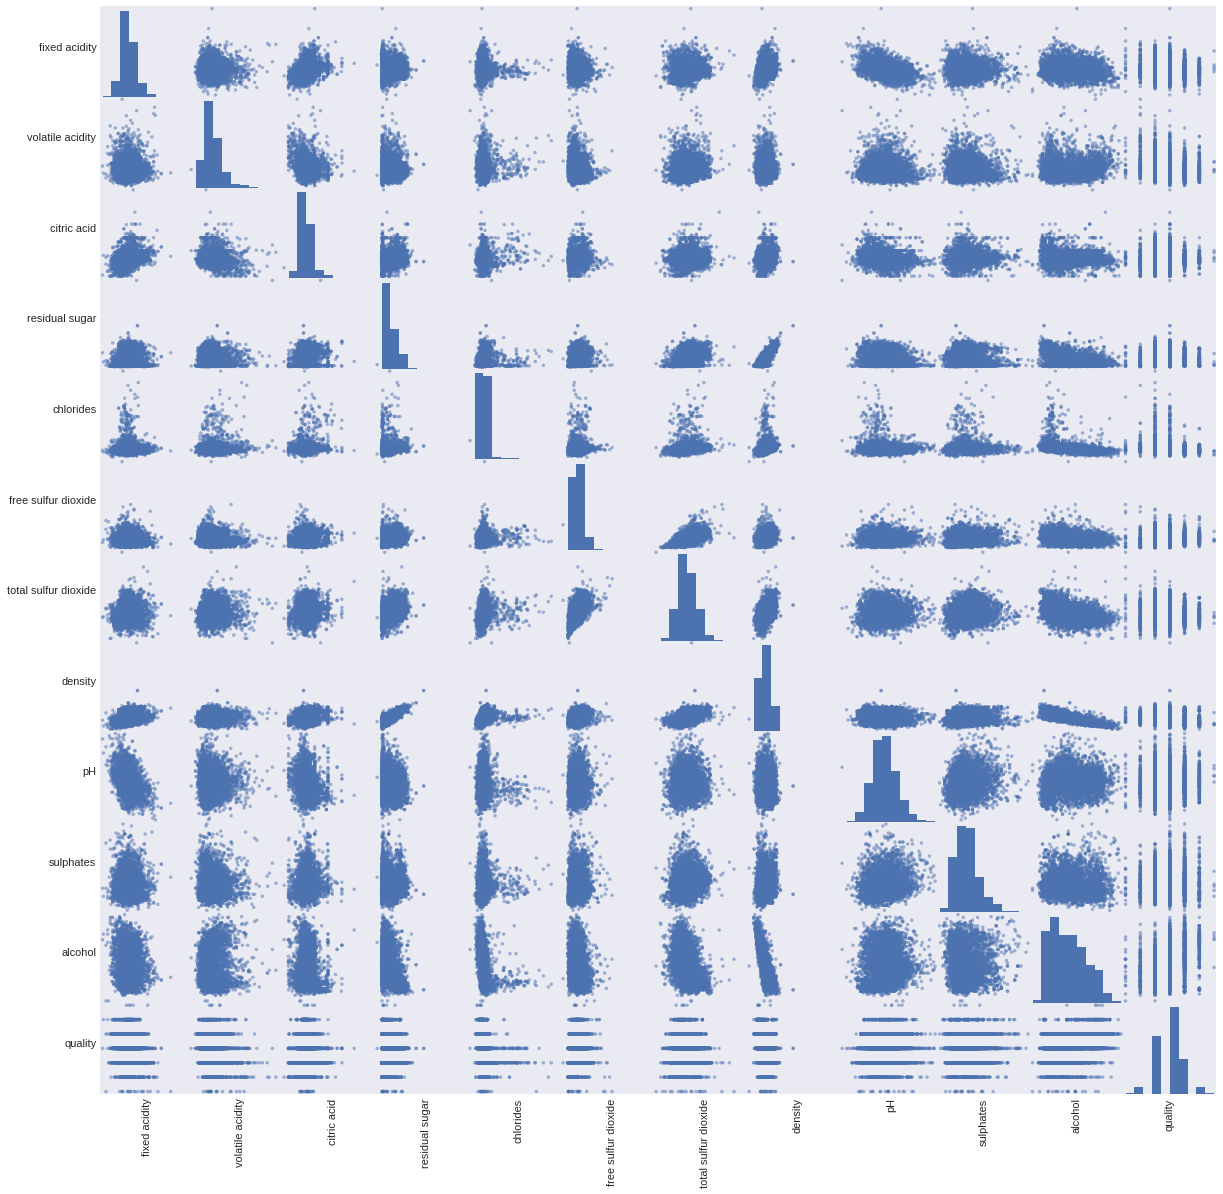

In [11]:
import pandas as pd
numeric_data = df.select(numeric_features).toPandas()

axs = pd.scatter_matrix(numeric_data, figsize=(20, 20));

n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())



<h2> From this above correlation diagram :</h2>
<p> We can Infer that Density and Residual sugar is highly (+ve )correlated  
 also alcohol and density is also highly (-ve )correlated  as the plots are  linear  </p>
 
 <h3>Hence we can remove density from our spark dataframe</h3>

In [12]:
df = df.select('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','pH', 'sulphates', 'alcohol', 'quality')
cols = df.columns
df.printSchema()

root
 |-- fixed acidity: double (nullable = true)
 |-- volatile acidity: double (nullable = true)
 |-- citric acid: double (nullable = true)
 |-- residual sugar: double (nullable = true)
 |-- chlorides: double (nullable = true)
 |-- free sulfur dioxide: double (nullable = true)
 |-- total sulfur dioxide: double (nullable = true)
 |-- pH: double (nullable = true)
 |-- sulphates: double (nullable = true)
 |-- alcohol: double (nullable = true)
 |-- quality: integer (nullable = true)



<h1 align="Center">Preparing Data for Machine Learning  (pyspark)</h1>
<p>As we are using spark we cannot just pass our dataset as a dependant and indepedant variable rather we have to create a vector of feature  each row and corresponding classes as labels  (Labels that is our dependant variable)</p>

In [0]:
from pyspark.ml.feature import  StringIndexer, VectorAssembler

In [0]:
# Create String Indexer for workclass and salary
from pyspark.ml.feature import StringIndexer,VectorAssembler,OneHotEncoder
from pyspark.ml import Pipeline


label_indexer = StringIndexer().setInputCol("quality").setOutputCol("label")

vectorAssembler = VectorAssembler().setInputCols(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide','pH', 'sulphates', 'alcohol']).setOutputCol("features")
# create pipeline
pipeline = Pipeline().setStages([label_indexer,vectorAssembler])

In [0]:
from pyspark.ml.feature import VectorAssembler

ignore = ['quality']
assembler = VectorAssembler(
    inputCols=[x for x in df.columns if x not in ignore],
    outputCol='features')

df=assembler.transform(df)


In [0]:
from pyspark.ml.feature import VectorAssembler

assembler1 =  StringIndexer().setInputCol("quality").setOutputCol("label")



In [0]:
pipeline = Pipeline().setStages([assembler1])

In [18]:
transformedDf = pipeline.fit(df).transform(df).select("features","label")
transformedDf.printSchema()

root
 |-- features: vector (nullable = true)
 |-- label: double (nullable = true)



<h1 align="center">Now as we have we can see we have vectorized the features and labels which now can be feed to the machine learining algorithm </h1>

<h2 align="center"> First step was to split the dataset into two parts that is train and test (which contains our feature and labels )</h2>

In [19]:
train, test = transformedDf.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 3430
Test Dataset Count: 1468


<h1>MODEL 1: Logistic Regression</h1>

In [0]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=50)
lrModel = lr.fit(train)


In [0]:
predictions = lrModel.transform(test)


<h2> Logistic Regression Evaluation score</h2>

In [28]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator()
print('MultiClassClassifaction:', evaluator.evaluate(predictions))

MultiClassClassifaction: 0.4724626732126655


<h1>MODEL 2 : Decision Tree</h1>

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier

dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 30)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)

<h2>Decision Tree Evaluation score </h2>

In [35]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator()
print('MultiClassClassifaction:', evaluator.evaluate(predictions))

MultiClassClassifaction: 0.5851817695803858


<h1>MODEL 3: RandomForest</h1>

In [0]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label',maxDepth=15).setNumTrees(300)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)

<h2>RandomForest Evaluation Score </h2>

In [39]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator()
print('MultiClassClassifaction:', evaluator.evaluate(predictions))

MultiClassClassifaction: 0.6546786207081865


<h1 >Final Conclusion:</h1>
<p> As the project came to its end we can conclude that Random Forest produces the best result but their are superior techniques like Gradient Discent  which is still in development phase in spark ml libraries   . As this was a multi class problem hence the accuracy rate is some what in the lower side , nevertheless this was pritty impressive result without using any sophisticated techniques . Well it was quite fun and challenging to do a project in spark </p>
 <h1 align="Center">THE END</h1>